# Multi-components fit with ORCS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import orcs.process

ModuleNotFoundError: No module named 'orcs'

In [8]:
cube = orcs.process.SpectralCube('/home/thomas/data/IC1613_Field1_SN3.merged.cm1.1.0.hdf5')

dev.31df|INFO| Cube is level 3
dev.31df|INFO| shape: (2048, 2064, 842)
dev.31df|INFO| wavenumber calibration: True
dev.31df|INFO| flux calibration: True
dev.31df|INFO| wcs calibration: True


IC 1613 (Laurent Drissen)

![alternative text](IC1613.png)

## Multiple components

IC 1613 Doppler Image of the North-East complex

![alternative text](IC1613-Doppler.png)

### Unresolved / partly resolved

(14750.0, 15400.0)

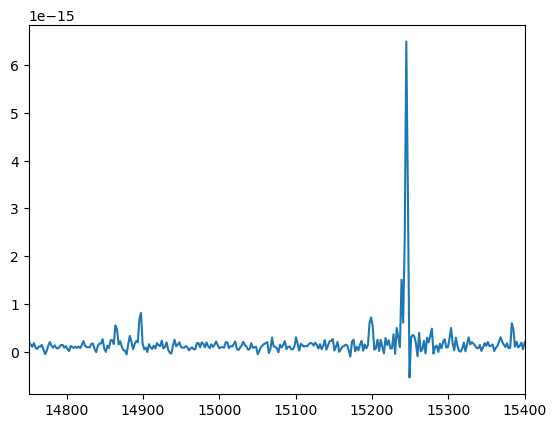

In [9]:
spec = cube.get_spectrum(250+97, 1404, 5)
spec.plot()
plt.xlim(14750,15400)

#### Single component fit (sinc)

dev.31df|WARNING| lines passed as float
dev.31df|INFO| lines: ['[NII]6548', 'HeI6678', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
dev.31df|INFO| estimated velocities: [-173.36152219873156]


BIC:  -29217.648085814253


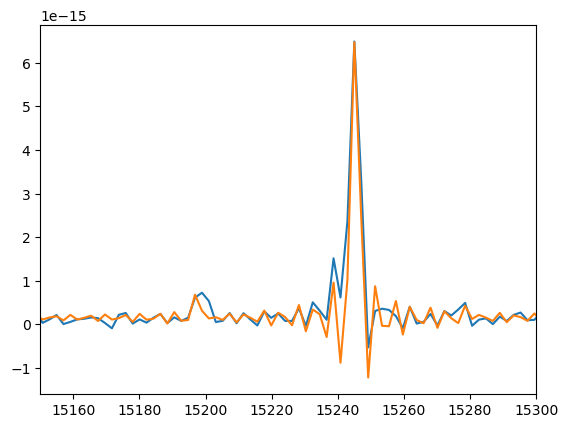

In [10]:
fit = spec.autofit()
spec.plot()
fit.get_spectrum().plot()
plt.xlim(15150,15300)
print('BIC: ', fit.BIC)

#### Sincgauss

dev.31df|WARNING| lines passed as float
dev.31df|INFO| lines: ['[NII]6548', 'HeI6678', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
dev.31df|INFO| estimated velocities: [-173.36152219873156]


BIC:  -29448.370317383982


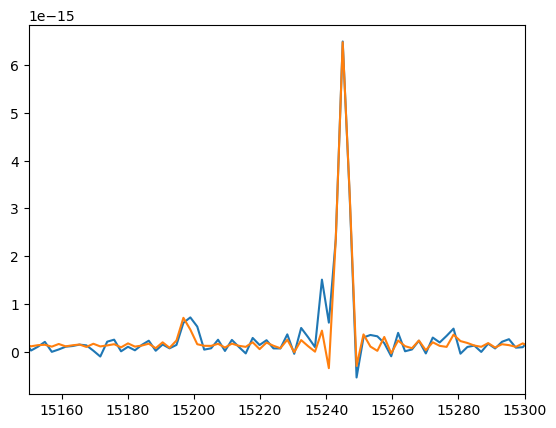

In [11]:
fit = spec.autofit(fmodel='sincgauss')
spec.plot()
fit.get_spectrum().plot()
plt.xlim(15150,15300)
print('BIC: ', fit.BIC)

#### 3 components

dev.31df|WARNING| lines passed as float
dev.31df|INFO| lines: ['[NII]6548', 'HeI6678', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
dev.31df|INFO| estimated velocities: [-173.36152219873156, -109.9365750528541, -198.7315010570826]


BIC:  -29589.460276596576


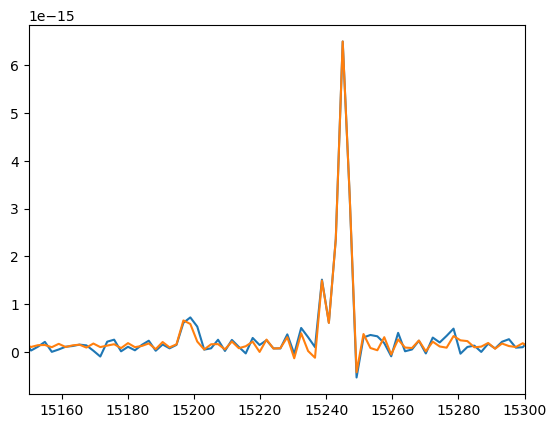

In [12]:
fit = spec.autofit(max_comps=3)
spec.plot()
fit.get_spectrum().plot()
plt.xlim(15150,15300)
print('BIC: ', fit.BIC)

##### 4 components ?

**Overfit**: BIC (Bayesian Information Criterion) is higher than the 3 components fits and shows a risk of overfit.

dev.31df|WARNING| lines passed as float
dev.31df|INFO| lines: ['[NII]6548', 'HeI6678', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
dev.31df|INFO| estimated velocities: [-173.36152219873156, -109.9365750528541, -198.7315010570826, -139.53488372093034]


BIC:  -29569.224024597246


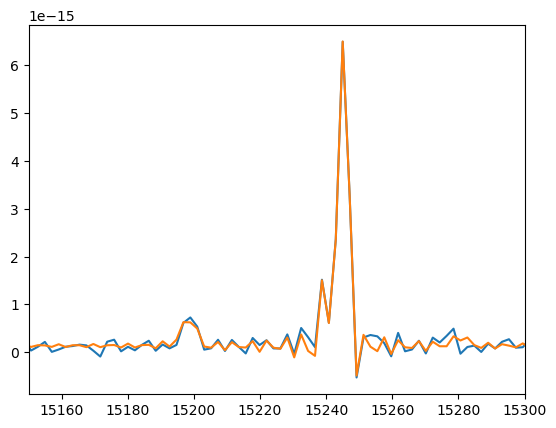

In [13]:
fit = spec.autofit(max_comps=4)
spec.plot()
fit.get_spectrum().plot()
plt.xlim(15150,15300)
print('BIC: ', fit.BIC)

#### Clean algorithm

Implementation of the CLEAN algorithm. Helps identifying multiple unresolved components.

(15150.0, 15300.0)

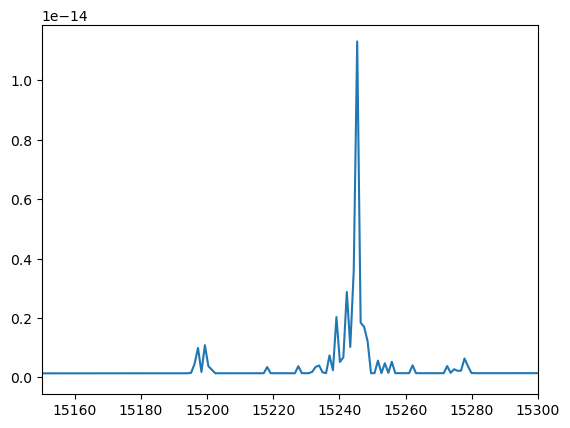

In [206]:
cleaned = spec.clean()
cleaned.plot()
plt.xlim(15150,15300)

### Resolved

INFO:root:lines: ['[NII]6548', 'HeI6678', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
INFO:root:estimated velocities: [-169.13319238900635, -80.33826638477808, -29.598308668076243]


(15150.0, 15300.0)

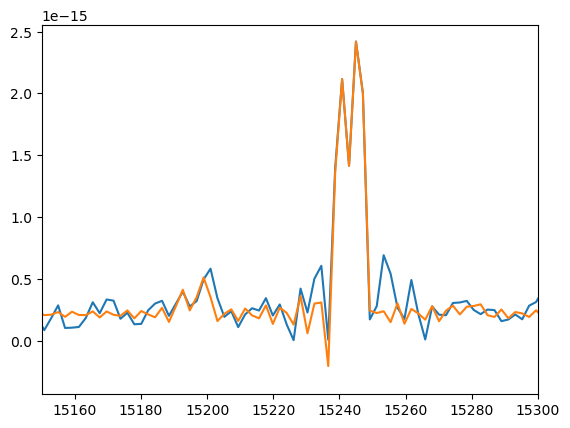

In [221]:
spec = cube.get_spectrum(250+82, 1388, 5)
fit = spec.autofit(max_comps=3)
spec.plot()
fit.get_spectrum().plot()
plt.xlim(15150,15300)

(14800.0, 15350.0)

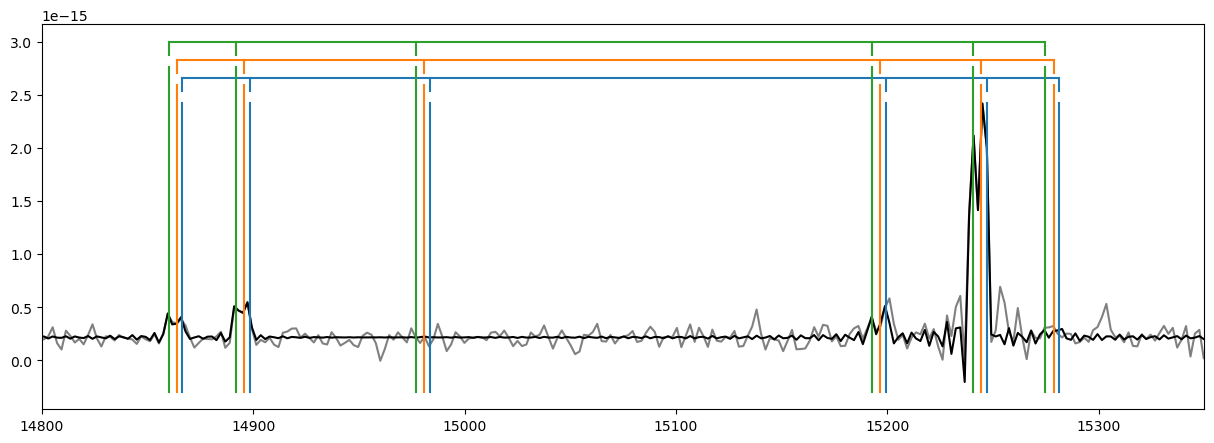

In [224]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.figure(figsize=(15,5))
spec.plot(c='gray')
fit.get_spectrum().plot(c='black')

def plot_components(spectrum, ncomp):
    nlines = fit.lines_params.shape[0] // ncomp
    tick_len = np.nanmax(spectrum.data.real) * 0.05
    bar_lower = np.nanmin(spectrum.data.real)

    for icomp, icolor in zip(range(ncomp), colors):
        ilines = fit.lines_params[icomp*nlines:(icomp+1)*nlines, 2]
        iy = np.nanmax(spectrum.data.real) * (1.1 + 0.07 * icomp)
        plt.plot((np.min(ilines), np.max(ilines)), (iy, iy), c=icolor)
        for iline in ilines:
            plt.plot((iline, iline), (iy, iy-tick_len), c=icolor)
            plt.plot((iline, iline), (iy - 2 * tick_len, bar_lower), c=icolor)



plot_components(spec, 3)

plt.xlim(14800, 15350)

## Fit of the whole region

In [225]:
cube.get_deep_frame().to_fits('df.fits')

INFO:root:Data written as df.fits in 0.10 s 


### Estimate parameters for multiple components

In [ ]:
region = 'circle(474.61111,1361.4167,204.45516)'
lines = ['[NII]6548', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
cube.estimate_parameters_in_region(region, lines, [-300,300], binning=2, max_comps=3, threshold=0.3, clean=True)

### Multiple components fit based on estimated parameters

Note: the following process must be run for 3, 2, and 1 components since, only 1 or 2 components may have been detected in some pixels (usually the brightests).

In [ ]:
cube.fit_lines_in_region_from_estimate(1, lines=lines, binning=2)

In [ ]:
# warning: a kernel restart is unavoidable to run this process right after the previous one
lines = ['[NII]6548', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
cube.fit_lines_in_region_from_estimate(2, lines=lines, binning=2)

In [ ]:
# warning: a kernel restart is unavoidable to run this process right after the previous one
lines = ['[NII]6548', '[SII]6731', 'H3', '[NII]6584', '[SII]6717']
cube.fit_lines_in_region_from_estimate(3, lines=lines, binning=2)